## 8.Gradient Descent

### The Idea Behind Gradient Descent

### Minimize or Maximize

#### Using mathematical notation

In [1]:
from collections import Counter
from linear_algebra import distance, vector_subtract, scalar_multiply
from functools import reduce
import math, random

We want to minimize sum_of_squares function

In [2]:
def sum_of_squares(v):
    """computes the sum of squared elements in v"""
    return sum(v_i ** 2 for v_i in v)

### Estimating the Gradient
If f is a function of one variable, its derivative at a point x measures how f(x) changes when we make a very small change to x.

In [3]:
def difference_quotient(f, x, h): # 다른_몫
    return (f(x + h) - f(x)) / h

In [4]:
def plot_estimated_derivative():
    
    def square(x):
        return x * x
    
    def derivative(x): # x 제곱 미분한거 # 기울기함수라고 할까나. 도함수
        return 2 * x
    
    derivative_estimate = lambda x: difference_quotient(square, x, h=0.00001)
    
    # plot to show they're basically the same
    import matplotlib.pyplot as plt
    x = range(-10, 10)
    plt.plot(x, list(map(derivative, x)), 'rx', label='Actual')  # red x
    plt.plot(x, list(map(derivative_estimate, x)), 'b+', label='Estimate') # blue +
    plt.legend(loc=9)
    plt.title('Actual vs Estimate')
    plt.show()

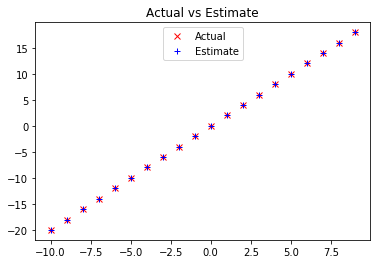

In [5]:
%matplotlib inline

plot_estimated_derivative()

### Numerical gradient

In [6]:
def partial_difference_quotient(f, v, i, h):
    # add h to just the i-th element of v
    w = [v_j + (h if j == i else 0)
         for j, v_j in enumerate(v)]
    
    return (f(w) - f(v)) / h

In [7]:
def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]

In [8]:
estimate_gradient(sum_of_squares, [1.,1.,1])

[2.00001000001393, 2.00001000001393, 2.00001000001393]

In [9]:
# maybe numpy version
import numpy as np

def estimate_gradient_np(f, v, h=0.00001):
    return (np.apply_along_axis(f, 1, v + h * np.eye(v.shape[0])) - f(v)) / h

In [10]:
estimate_gradient_np(lambda v: np.sum(v * v), np.array([1.,1.,1]))

array([2.00001, 2.00001, 2.00001])

### Using the Gradient

In [11]:
def step(v, direction, step_size):
    """move step_size in the direction from v"""
    return [v_i + step_size * direction_i
             for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

Remark: step_size is also called learning_rate

In [12]:
def step_np(v, direction, step_size):
    """move step_size in the direction from v"""
    return v + step_size * direction

def sum_of_squares_gradient_np(v):
    return 2 * v

In [13]:
print("using the gradient")

v = [random.randint(-10,10) for i in range(3)]

tolerance = 0.0000001

while True:
    #print(v, sum_of_squares(v))
    gradient = sum_of_squares_gradient(v) # compute the gradient at v
    next_v = step(v, gradient, -0.01) # take a negative gradient step
    if distance(next_v, v) < tolerance: # stop if we're converging
        break
    v = next_v # continue if we're not
    
print("minimum v", v)
print("minimum value", sum_of_squares(v))
print()

using the gradient
minimum v [-2.455396212587199e-06, -6.138490531467997e-07, 4.2969433720275985e-06]
minimum value 2.4869503563248693e-11



### Choosing the Right Step Size (or Learning rate)
 - ...more of an art than a science.

In [14]:
step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

 - if learning rate is too large, it diverges.
 - if learning rate is too small, it converges too slow or may fall into local minimum

### Experiment sith various learning rates
 #in class, changes lr = 10, 1.1, 1, 0.1, 0.01
 #10 : diverge
 #1.1 : diverge
 #1: oscilliating
 #0.1: good pace
 #0.01 : two slow

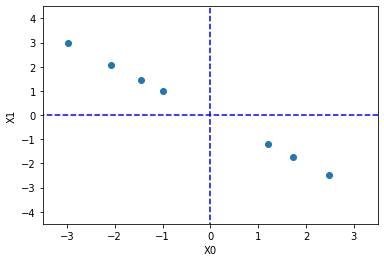

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def sum_of_squares_gradient_np(v):
    return 2 * v

def gradient_descent(gradient_f, init_x, lr=0.01, step_num=10000, tolerance=0.0000001):
    x = init_x
    x_history = []
    for i in range(step_num):
        x_history.append(x.copy())
        x_prev = x.copy()
        x -= lr * gradient_f(x)
        if np.linalg.norm(x - x_prev) < tolerance:  # stop if we're converging
            break
    return x, x_history

init_x = np.array([-1.0, 1.0])

lr = 1.1  # try with 10, 1.1, 1, 0.1, 0.01
step_num = 100
x, x_history = gradient_descent(sum_of_squares_gradient_np, init_x, lr=lr, step_num=step_num, tolerance=tolerance)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
x_history = np.array(x_history)
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [16]:
def safe(f):
    """define a new function that wraps f and return it"""
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('int')  # this means "infinity" in Python
        
    return safe_f

### Putting It All Together

In [33]:
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    """use gradient descent to find theta that minimizes target function"""
    
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    
    theta = theta_0   # set theta to initial value
    target_fn = safe(target_fn)   # sage version of target_fn
    value = target_fn(theta)   # value we're minimizing
    
    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size)
                       for step_size in step_sizes]
        print("next_thetas",next_thetas)
        # choose the one that minimizes the error function
        next_theta = min(next_thetas, key = target_fn)
        print("next_theta", next_theta)
        next_value = target_fn(next_theta)
        
        # stop if we're "converging"
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value

#### Example : Minimizing sum_of_squares

In [34]:
minimize_batch(sum_of_squares, sum_of_squares_gradient, [10,20,4,5])

next_thetas [[-1990, -3980, -796, -995], [-190, -380, -76, -95], [-10, -20, -4, -5], [8.0, 16.0, 3.2, 4.0], [9.8, 19.6, 3.92, 4.9], [9.98, 19.96, 3.992, 4.99], [9.998, 19.996, 3.9992, 4.999], [9.9998, 19.9996, 3.99992, 4.9999]]
next_theta [8.0, 16.0, 3.2, 4.0]
next_thetas [[-1592.0, -3184.0, -636.8, -796.0], [-152.0, -304.0, -60.8, -76.0], [-8.0, -16.0, -3.2, -4.0], [6.4, 12.8, 2.56, 3.2], [7.84, 15.68, 3.136, 3.92], [7.984, 15.968, 3.1936, 3.992], [7.9984, 15.9968, 3.19936, 3.9992], [7.99984, 15.99968, 3.199936, 3.99992]]
next_theta [6.4, 12.8, 2.56, 3.2]
next_thetas [[-1273.6, -2547.2, -509.44, -636.8], [-121.6, -243.2, -48.64, -60.8], [-6.4, -12.8, -2.56, -3.2], [5.12, 10.24, 2.048, 2.56], [6.272, 12.544, 2.5088, 3.136], [6.3872, 12.7744, 2.5548800000000003, 3.1936], [6.39872, 12.79744, 2.559488, 3.19936], [6.399872, 12.799744, 2.5599488, 3.199936]]
next_theta [5.12, 10.24, 2.048, 2.56]
next_thetas [[-1018.88, -2037.76, -407.552, -509.44], [-97.28, -194.56, -38.912, -48.64], [-5.12,

[0.0006805647338418772,
 0.0013611294676837543,
 0.00027222589353675085,
 0.0003402823669209386]

In [19]:
minimize_batch(sum_of_squares, sum_of_squares_gradient, [10,20,4,5,0,1])

[0.0006805647338418772,
 0.0013611294676837543,
 0.00027222589353675085,
 0.0003402823669209386,
 0.0,
 6.805647338418771e-05]

#### Example : Centering a certain point

In [20]:
def myf(v):
    return (v[0]-3)**2 + (v[1]-2)**2

def myf_gradient(v):
    return [2.0*v[0]-6, 2.0*v[1]-4]

minimize_batch(myf, myf_gradient, [5000.,50.])

[3.0016059738814325, 2.000015426605225]

In [21]:
c = np.array([0,0])
X = c + np.array([[5, 6],
                  [7, 8]])

(v[0]-3)**2 + (v[1]-2)**2
[2.0*v[0]-6, 2.0*v[1]-4]

[-6.000004910792425, -4.000001227698107]

In [24]:
from functools import partial

def f1(x, c):
    x = np.array(x)
    c = np.array(c)
    return np.sum((x - c)**2)

def f1_gradient(x, c):
    x = np.array(x)
    c = np.array(c)
    return 2*x - 2*c

def numerical_gradient(v, f, h=0.00001):
    return (f(v) - np.apply_along_axis(f, 1, v - h * np.eye(len(v)))) / h

c = np.array([7,70,7,4])

f = partial(f1, c=c)
#gradient_f = partial(numerical_gradient, f=f)
gradient_f = partial(f1_gradient, c=c)

minimize_batch(f, gradient_f, [0,0,0,0])

[6.999843894783611, 69.99843894783609, 6.999843894783611, 3.9999107970192056]

Sometimes we'll instead want to maximize a function, which we can do by minimizing its negative (which has a corresponding negative gradient):

In [25]:
def negate(f):
    """return a function that for any input x returns -f(x)"""
    return lambda *arg, **kwargs: -f(*args, **kwargs)

def negate_all(f):
    """the same when f returns a list of numbers"""
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]

def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    return minimize_batch(negate(target_fn),
                          negate_all(gradient_fn),
                          theta_0,
                          tolerance)

#### Maximizing batch Example
 - FInd the vaiable maximizing normal pdf.

In [28]:
from functools import partial

def normal_pdf(npx, mu, sigma):
    x = npx[0]
    return ((1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))))

def numerical_gradient(v, f, h=0.00001):
    return (np.apply_along_axis(f, 1, v + h * np.eye(len(v))) -f(v)) / h

f = partial(normal_pdf, mu=0, sigma=1)
gradient_f = partial(numerical_gradient, f=f)
init_x = np.array([-4.])

maximize_batch(f, gradient_f, init_x)

ValueError: could not convert string to float: 'int'